# Esport - CS2 demo analysis

This jupyter notebook can be found here https://drive.google.com/file/d/11yr8qwfT3YO204pEjOpYRfRXDcGdGQQV/view?usp=sharing

- Demo file: https://drive.google.com/file/d/1AVZ3IdrN-TCkclVUcSEyjwrYMH58aqWe/view?usp=sharing
- Map: https://drive.google.com/file/d/1jQZULatBDxeBHUeQfj9XUgFDbwjwvKhm/view?usp=sharing

Project requirements:
<br>numpy
<br>pandas
<br>matplotlib
<br>demoparser2
<br>jupyterlab
<br>seaborn

Useful links:
- HLTV results - https://www.hltv.org/results
- CS2 events - https://cs2.poggu.me/dumped-data/game-events/
- CS2 map sizes - https://github.com/pnxenopoulos/awpy/blob/main/awpy/data/map_data.py

CS2 Parser:
- Parser - https://github.com/LaihoE/demoparser
- Documentation - https://github.com/LaihoE/demoparser/tree/main/documentation/python
- Example - https://github.com/LaihoE/demoparser/blob/main/examples/1vX/main.py
- Examples - https://github.com/LaihoE/demoparser/tree/main/examples

## Imports

In [2]:
from demoparser2 import DemoParser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns

## Functions

In [3]:
def draw_map(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X'], df['Y'], c='blue', marker='o', label='Player Positions')
    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
def draw_movement(df_all, df_path=None):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))
    
    img = mpimg.imread('Cs2_mirage_radar.webp')
    # Plot the image behind the points
    plt.imshow(img, extent=[-3230, 1883, -3490, 1713], aspect='auto')  # Extent sets the image limits
    
    plt.scatter(df_all['X'], df_all['Y'], c='blue', marker='o', label='Player Positions')

    if df_path is not None:
        plt.scatter(df_path['X'], df_path['Y'], color='red', linewidth=2, label='Highlighted path', marker='o')

    plt.xlim(-2800, 1500)
    plt.ylim(-3000, 1000)
    
    # Adding labels and title
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('2D Map of Player Positions')
    
    # Display the plot
    plt.grid(True)
    plt.legend()
    plt.show()

# Data overview

In [5]:
parser = DemoParser("demos/eternal-fire-vs-natus-vincere-m2-mirage.dem")

## Events

In [7]:
max_round = df_player_spawns["total_rounds_played"].max() + 1
max_round

np.int32(18)

In [6]:
df_deaths = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
df_weapon_fires = parser.parse_event("weapon_fire", player=["X", "Y"], other=["total_rounds_played"])
df_player_spawns = parser.parse_event("player_spawn", other=["total_rounds_played"])
df_player_teams = parser.parse_event("player_team", other=["total_rounds_played"])
df_player_hurts = parser.parse_event("player_hurt", other=["total_rounds_played"])
df_round_starts = parser.parse_event("round_start")
df_round_ends = parser.parse_event("round_end")
df_last_round_half = parser.parse_event("round_announce_last_round_half")
df_item_purchases = parser.parse_event("item_purchase", other=["total_rounds_played"])
df_item_pickups = parser.parse_event("item_pickup", other=["total_rounds_played"])
df_bomb_plants = parser.parse_event("bomb_planted", other=["total_rounds_played"])
df_bomb_defuses = parser.parse_event("bomb_defused", other=["total_rounds_played"])
df_bomb_explosions = parser.parse_event("bomb_exploded", other=["total_rounds_played"])
df_bomb_drops = parser.parse_event("bomb_dropped", other=["total_rounds_played"])
df_bomb_pickups = parser.parse_event("bomb_pickup", other=["total_rounds_played"])
df_hegrenade_detonations = parser.parse_event("hegrenade_detonate", other=["total_rounds_played"])
df_flashbang_detonations = parser.parse_event("flashbang_detonate", other=["total_rounds_played"])
df_smokegrenade_detonations = parser.parse_event("smokegrenade_detonate", other=["total_rounds_played"])
df_smokegrenade_expirations = parser.parse_event("smokegrenade_expired", other=["total_rounds_played"])
df_inferno_startburns = parser.parse_event("inferno_startburn", other=["total_rounds_played"])
df_inferno_expirations = parser.parse_event("inferno_expire", other=["total_rounds_played"])
df_player_pings = parser.parse_event("player_ping", other=["total_rounds_played"])
df_player_sounds = parser.parse_event("player_sound", other=["total_rounds_played"])
df_ticks = parser.parse_ticks(["X", "Y"])

Team interpretation in numbers:
- 3 = CT
- 2 = T

In [8]:
df_player_teams

,disconnect,isbot,oldteam,silent,team,tick,total_rounds_played,user_name,user_steamid
0,False,False,2,True,3,87273,12,jL,76561198176878303
1,False,False,3,True,2,87273,12,Calyx,76561198052546265
2,False,False,2,True,3,87273,12,w0nderful,76561199063068840
3,False,False,3,True,2,87273,12,Wicadia,76561198812513923
4,False,False,3,True,2,87273,12,MAJ3R,76561197967432889
5,False,False,2,True,3,87273,12,Aleksib,76561198013243326
6,False,False,3,True,2,87273,12,XANTARES,76561198044118796
7,False,False,2,True,3,87273,12,b1t,76561198246607476
8,False,False,2,True,3,87273,12,iM,76561198050250233
9,False,False,3,True,2,87273,12,woxic,76561198083485506


In [9]:
# Another approach
df_team_info2 = parser.parse_player_info();
df_team_info2

,steamid,name,team_number
0,76561198176878303,jL,3
1,76561198052546265,Calyx,2
2,76561199063068840,w0nderful,3
3,76561198812513923,Wicadia,2
4,76561197967432889,MAJ3R,2
5,76561198013243326,Aleksib,3
6,76561198044118796,XANTARES,2
7,76561198246607476,b1t,3
8,76561198050250233,iM,3
9,76561198083485506,woxic,2


In [10]:
df_deaths

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,NaN,NaN,None,None,296.651398,-1586.485962,Aleksib,76561198013243326,False,...,0,150.391434,-1526.738159,Wicadia,76561198812513923,glock,17293822569165815812,20660576547,,0
1,False,NaN,NaN,None,None,-452.761658,-1758.071045,Aleksib,76561198013243326,False,...,0,-531.607178,-2378.742432,XANTARES,76561198044118796,glock,17293822569165815812,20660576547,,0
2,False,-531.607178,-2378.742432,XANTARES,76561198044118796,-1570.978027,-760.632751,MAJ3R,76561197967432889,False,...,0,-1272.865112,-1050.418091,iM,76561198050250233,usp_silencer,17293822569145761853,13626608964,,0
3,False,NaN,NaN,None,None,-812.001831,-2082.587646,w0nderful,76561199063068840,False,...,0,-465.970337,-2350.779785,Calyx,76561198052546265,glock,17293822569105195012,34398553971,,0
4,False,NaN,NaN,None,None,NaN,NaN,None,None,False,...,0,-1693.296631,-1375.607422,Aleksib,76561198013243326,planted_c4,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,NaN,NaN,None,None,-1698.991211,682.782166,jL,76561198176878303,False,...,17,-1064.924072,151.871338,XANTARES,76561198044118796,m4a1_silencer,17293822569131868220,34241486015,,0
121,False,-2065.616211,-559.346924,iM,76561198050250233,-1699.885620,681.705627,jL,76561198176878303,False,...,17,-1210.908081,285.837585,MAJ3R,76561197967432889,m4a1_silencer,17293822569131868220,34241486015,,0
122,False,-1064.924072,151.871338,XANTARES,76561198044118796,-1022.358459,120.646042,woxic,76561198083485506,False,...,17,-1699.831299,683.073303,jL,76561198176878303,ak47,17293822569170534407,25065970543,,0
123,False,-1699.792603,683.121765,jL,76561198176878303,-2495.580322,328.931458,Aleksib,76561198013243326,False,...,17,-1021.273499,123.897125,woxic,76561198083485506,deagle,17293822569105129473,29398974889,,0


In [11]:
df_deaths.keys()

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'attackerinair', 'distance',
       'dmg_armor', 'dmg_health', 'dominated', 'headshot', 'hitgroup',
       'noreplay', 'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick',
       'total_rounds_played', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon', 'weapon_fauxitemid', 'weapon_itemid',
       'weapon_originalowner_xuid', 'wipe'],
      dtype='object')

## Movements

In [12]:
df_movements = parser.parse_ticks(["X", "Y", "team_rounds_total", "team_name", "is_alive", "total_rounds_played"])
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,TERRORIST,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,TERRORIST,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,TERRORIST,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


Rename "TERRORIST" into "T" to match the naming.

In [13]:
df_movements.loc[:, "team_name"] = df_movements["team_name"].replace("TERRORIST", "T")
df_movements

,total_rounds_played,team_rounds_total,team_name,X,Y,is_alive,tick,steamid,name
0,0,0,T,1136.047729,-160.015564,True,1,76561198176878303,jL
1,0,0,CT,-1656.000000,-1800.000000,True,1,76561198052546265,Calyx
2,0,0,T,1216.000000,-307.000000,True,1,76561199063068840,w0nderful
3,0,0,CT,-1656.000000,-1976.000000,True,1,76561198812513923,Wicadia
4,0,0,CT,-1776.000000,-1976.000000,True,1,76561197967432889,MAJ3R
...,...,...,...,...,...,...,...,...,...
1405715,18,13,CT,-2216.906006,621.395386,False,140592,76561198013243326,Aleksib
1405716,18,5,T,-1064.924072,151.871338,False,140592,76561198044118796,XANTARES
1405717,18,13,CT,-701.487671,-1357.026489,False,140592,76561198246607476,b1t
1405718,18,13,CT,-1807.516724,-54.575256,True,140592,76561198050250233,iM


In [14]:
draw_movement(df_movements)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jakub\\esport\\Cs2_mirage_radar.webp'

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Player "Calyx" movements

All selected movements for a specific player with name Calyx.

In [ ]:
df_calyx_movement = df_movements[(df_movements["name"] == "Calyx")]
df_calyx_movement

Selected movements for the first round only.

In [ ]:
df_calyx_movement_round1 = df_calyx_movement[(df_calyx_movement["total_rounds_played"]) == 0]
df_calyx_movement_round1

#### First round movement

In [ ]:
draw_movement(df_calyx_movement_round1)

Filter all movement for comparison to make calculation faster.

In [ ]:
df_movements_filtered = df_movements[::5]
df_movements_filtered

In [ ]:
print(f"df_movements:\t\t{df_movements.size}\ndf_movements_filtered:\t {df_movements_filtered.size}")

In [ ]:
draw_movement(df_movements_filtered, df_calyx_movement_round1)

#### All movements as a CT

All movements for player named Calyx in the CT team.

In [15]:
draw_movement(df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

NameError: name 'df_calyx_movement' is not defined

Comparison of Calyx movements in the CT team with all movements.

In [16]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "CT")])

NameError: name 'df_movements_filtered' is not defined

#### All movements as a T

All movements for player named Calyx in the T team.

In [17]:
draw_map(df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

NameError: name 'df_calyx_movement' is not defined

Comparison of Calyx movements in the T team with all movements.

In [18]:
draw_movement(df_movements_filtered, df_calyx_movement[(df_calyx_movement["team_name"] == "T")])

NameError: name 'df_movements_filtered' is not defined

## Purchases

Data overview of purchase event table for all game rounds.

In [19]:
df_item_purchases

,cost,custom_name,float,inventory_slot,item_name,name,paint_seed,skin,skin_id,steamid,stickers,tick,total_rounds_played,was_sold
0,650,None,NaN,0,item_kevlar,Wicadia,NaN,None,NaN,76561198812513923,[],87,0,False
1,650,None,NaN,0,item_kevlar,woxic,NaN,None,NaN,76561198083485506,[],106,0,False
2,300,None,NaN,0,P250,jL,NaN,None,NaN,76561198176878303,[],137,0,True
3,300,None,NaN,1,Smoke Grenade,jL,NaN,None,NaN,76561198176878303,[],159,0,False
4,200,None,NaN,2,Flashbang,jL,NaN,None,NaN,76561198176878303,[],170,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,400,None,NaN,2,Molotov,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
752,200,None,NaN,3,Flashbang,woxic,NaN,None,NaN,76561198083485506,[],134774,17,False
753,200,None,NaN,3,Flashbang,Wicadia,NaN,None,NaN,76561198812513923,[],134915,17,False
754,300,None,NaN,4,Smoke Grenade,woxic,NaN,None,NaN,76561198083485506,[],135029,17,False


### All rounds purchases

Total number of purchases for each item.

Plotting the chart of purchases for each weapon using pure matplotlib.

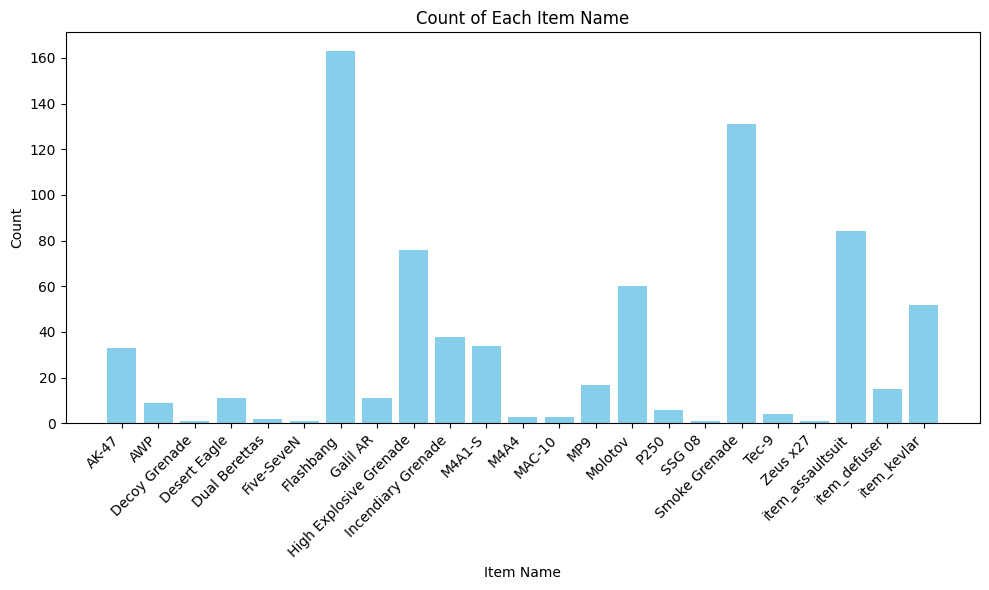

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(item_name_counts_df['item_name'], item_name_counts_df['count'], color='skyblue')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Using seaborn package to plot the chart instead.

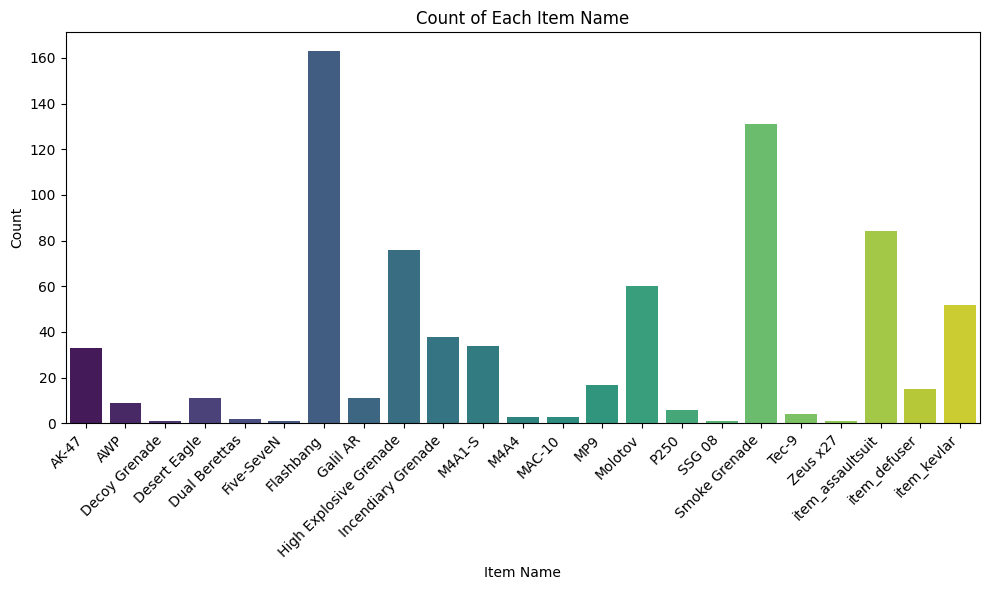

In [22]:
# Plotting with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='count', data=item_name_counts_df, hue='item_name', palette='viridis')

# Adding labels and title
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Count of Each Item Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Grouped item purchases for each player

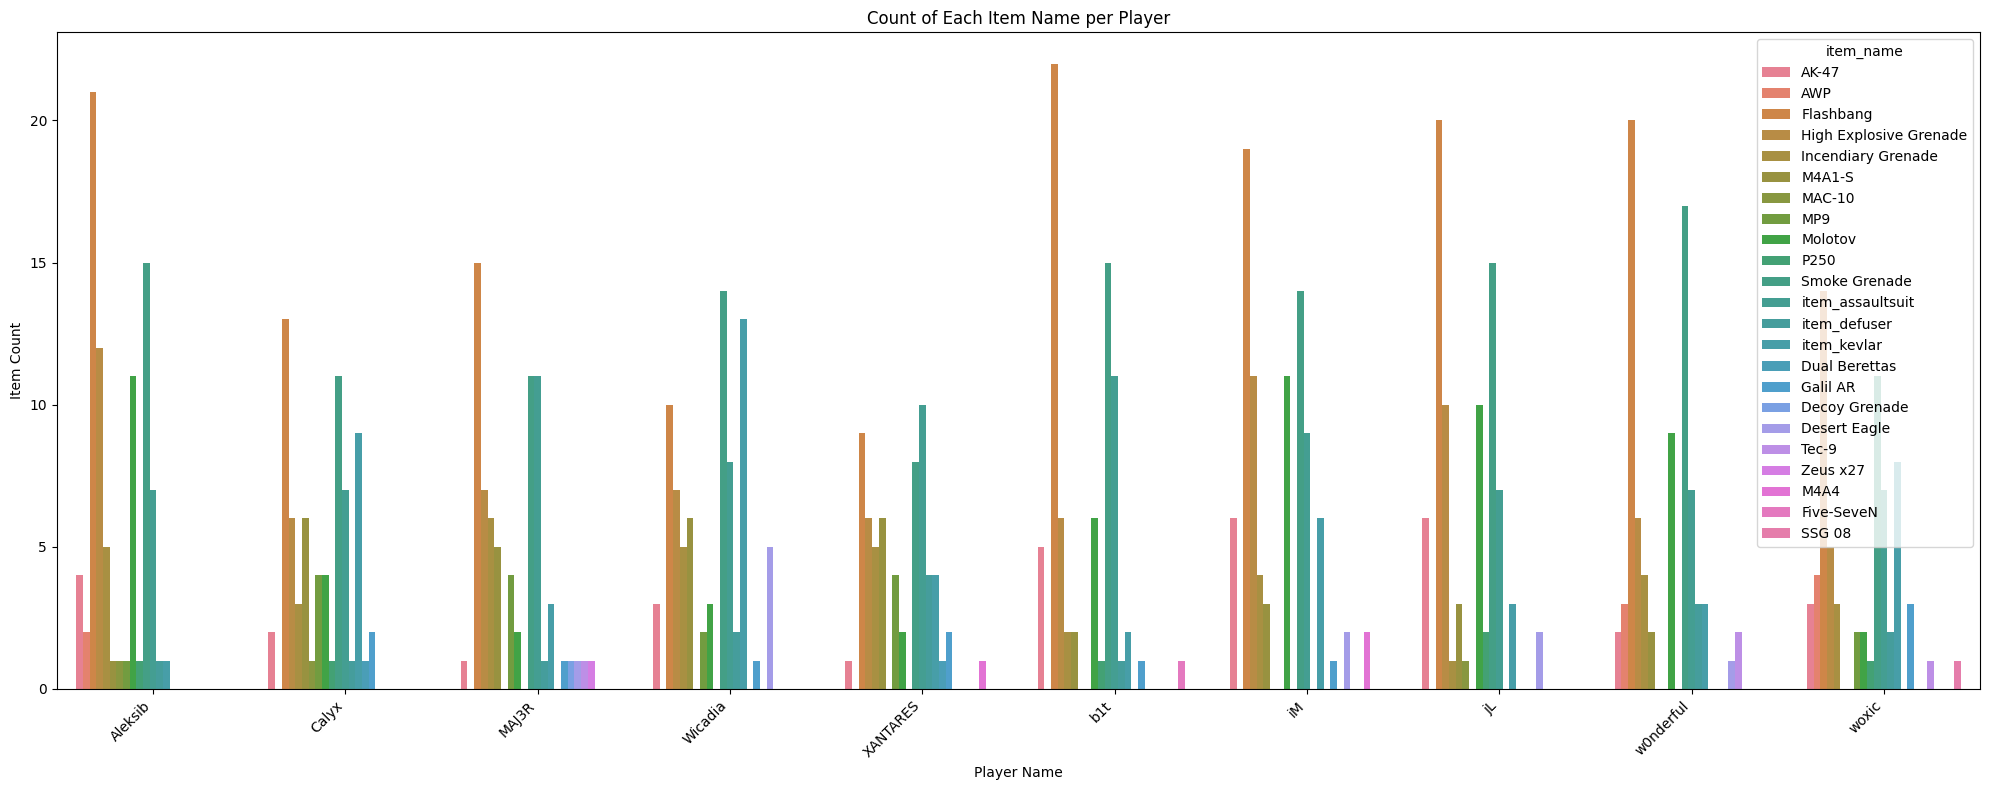

In [23]:
# Group by 'name' and 'item_name' to get the count of each item per player
item_name_per_player = df_item_purchases.groupby(['name', 'item_name']).size().reset_index(name='count')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='name', y='count', hue='item_name', data=item_name_per_player)

# Adding labels and title
plt.xlabel('Player Name')
plt.ylabel('Item Count')
plt.title('Count of Each Item Name per Player')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Task 1

Choose and analyse **four** situation that you find interesting and can be used as an information used to improve players' knowledge.

Here are some examples:
- Identifying most frequent weapon used - determine the most frequently fired weapon by each player across the demo
- Tracking player deaths over time - track the number of deaths for each player across the rounds
- Finding players with highest damage taken - identify players who took the most damage in the demo
- Bomb events analysis - track bomb planting and defusing events over rounds
- Flashbang and HE grenade effectiveness - measure the effectiveness of flashbangs and HE grenades by their usage and detonations
- Team composition over time - track how player teams changed over the course of the game

In [70]:
# This is helpful to see what columns does the event contain
print(df_player_hurts.columns)
print(df_smokegrenade_detonates.columns)

Index(['armor', 'attacker_name', 'attacker_steamid', 'dmg_armor', 'dmg_health',
       'health', 'hitgroup', 'tick', 'user_name', 'user_steamid', 'weapon',
       'total_damage'],
      dtype='object')
Index(['entityid', 'tick', 'user_name', 'user_steamid', 'x', 'y', 'z'], dtype='object')


C:\Users\jakub\AppData\Local\Temp\ipykernel_28620\3534986017.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_damage', x='player', data=damage_by_player, palette="magma")


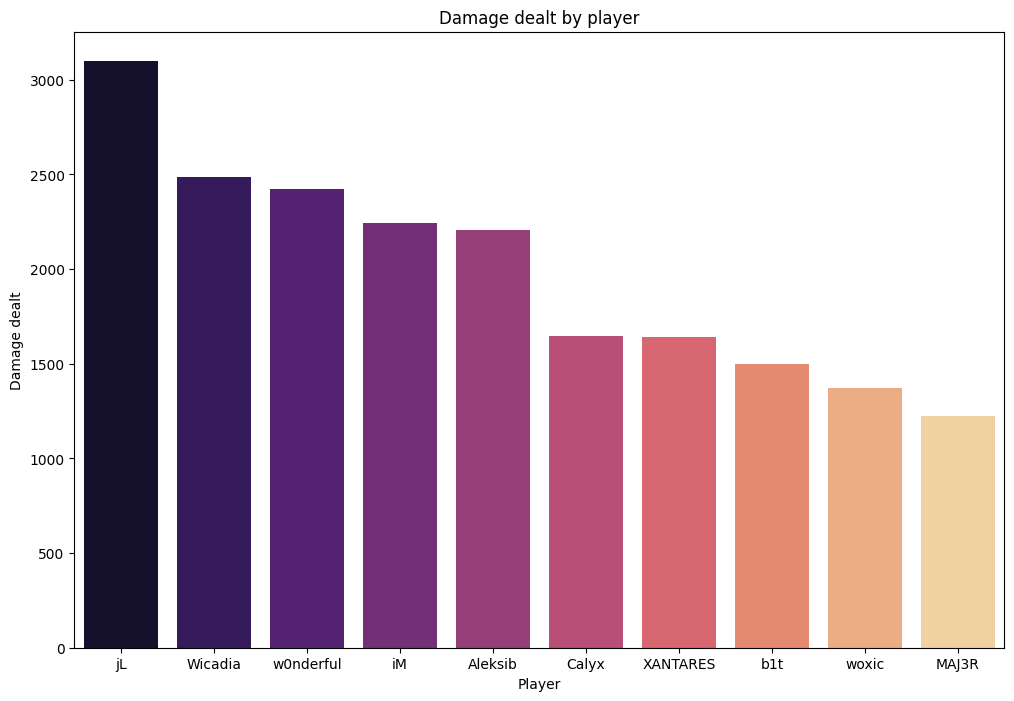

In [61]:
# ---DAMAGE DEALT BY PLAYERS ORDERED DESCENDING---

# Total damage done to health and armor
df_player_hurts = parser.parse_event("player_hurt") # This parses events player_hurt (those are used to register damage done)
df_player_hurts['total_damage'] = df_player_hurts['dmg_health'] + df_player_hurts['dmg_armor']

# Grouping damage by player (attacker)
damage_by_player = df_player_hurts.groupby('attacker_name')['total_damage'].sum().reset_index()

# Renaming columns
damage_by_player.columns = ['player', 'total_damage']

# Ordering by damage descending 
damage_by_player = damage_by_player.sort_values(by='total_damage', ascending=False)

# Visualisation using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='total_damage', x='player', data=damage_by_player, palette="magma")
plt.title('Damage dealt by player')
plt.ylabel('Damage dealt')
plt.xlabel('Player')
plt.show()

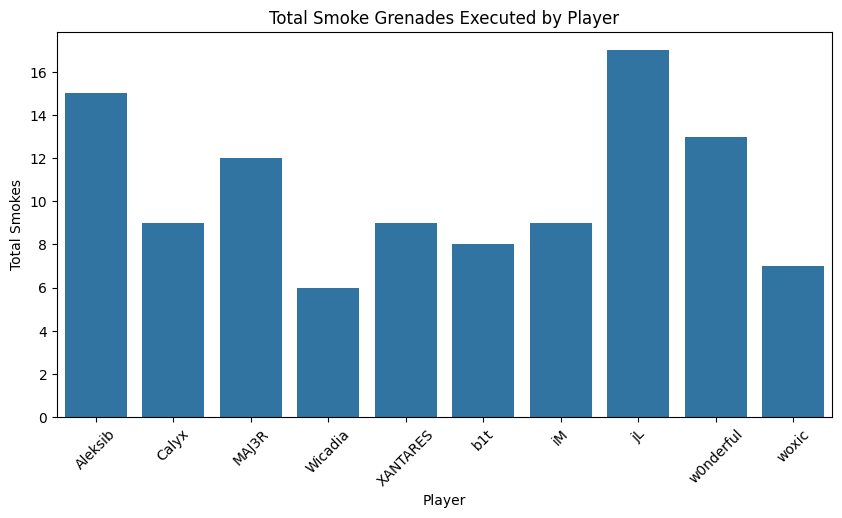

In [72]:
# Načtení eventů spojených s detonací smoke granátů
df_smokegrenade_detonates = parser.parse_event("smokegrenade_detonate")

# Agregace počtu hozených smoke granátů podle hráče
smokes_executed = df_smokegrenade_detonates.groupby('user_name').size().reset_index(name='total_smokes')

# Vizualizace pomocí Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y='total_smokes', x='user_name', data=smokes_executed)
plt.title('Total Smoke Grenades Executed by Player')
plt.ylabel('Total Smokes')
plt.xlabel('Player')
plt.xticks(rotation=45)  # Otočení jmen hráčů pro lepší čitelnost
plt.show()
